In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import lifelines

%matplotlib inline
%config InlineBackend.figure_format='svg'


In [2]:
link='/home/brayan/GoogleDrive/MyCopy/You_tube_database/archive/'
ima='/home/brayan/Dropbox/Latex/MBA/TCC/USPSC-v2.1/USPSC-img/'
dados_sur_orig=pd.read_csv(link+'dados_sur_exp_2.csv',index_col=0)
dados_sur=dados_sur_orig.copy()
print(dados_sur.dtypes)
dados_sur.sample(3)

Id                    object
Categoria             object
Subscriptores        float64
Duracao              float64
view_count_dur         int64
likes_dur              int64
dislikes_dur           int64
comment_count_dur      int64
trending_dur         float64
Status                 int64
dtype: object


,Id,Categoria,Subscriptores,Duracao,view_count_dur,likes_dur,dislikes_dur,comment_count_dur,trending_dur,Status
43397,xZt_89aY0r8,Sports,869000.0,544.0,132343,1195,145,339,9.170213,1
24597,lJ1_VimiG-E,Sports,11600000.0,278.0,271079,3895,312,371,10.191489,1
82996,aIFcLQFPWYI,Music,623000.0,146.0,4138560,151079,1872,1989,7.127660,1


<AxesSubplot:xlabel='timeline'>

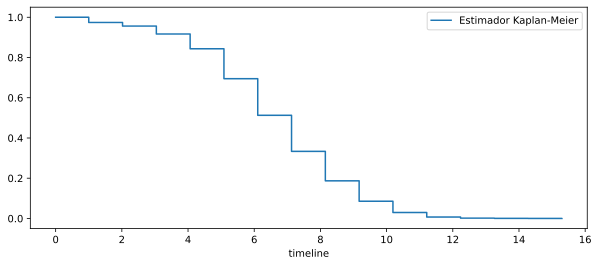

In [3]:

from lifelines import KaplanMeierFitter


## Example Data 
T = list(dados_sur['trending_dur']) #durations
E = list(dados_sur['Status']) # event observed

## create an kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(T, E,label='Estimador Kaplan-Meier')


x = np.linspace(0, 7.125, 500)
y=np.zeros(500)

N, M = 10, 4
fig, ax = plt.subplots(figsize=(N, M))
kmf.plot(ci_show=False,ax=ax) ## ci_show is meant for Confidence interval, since our data set is too tiny,



### Ajustando modelos univariados 

/home/brayan/.local/lib/python3.10/site-packages/lifelines/fitters/__init__.py:1000: ApproximationWarning: 
The Hessian for PiecewiseExponentialFitter's fit was not invertible. We will instead approximate it using the pseudo-inverse.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

  warnings.warn(warning_text, exceptions.ApproximationWarning)


<AxesSubplot:>

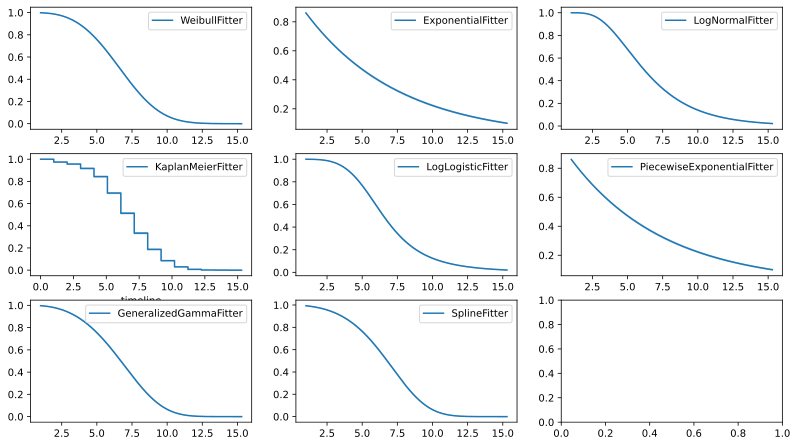

In [4]:
# Fonte: https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html#other-parametric-models-exponential-log-logistic-log-normal-and-splines
# Algumas referências adicionais:
#

import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

T = dados_sur['trending_dur'] #durations
E = dados_sur['Status'] # event observed
fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

## Aplicando o modleo de cox para covariáveis quantitativas


In [10]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)


<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 21589 total observations, 0 right-censored observations>

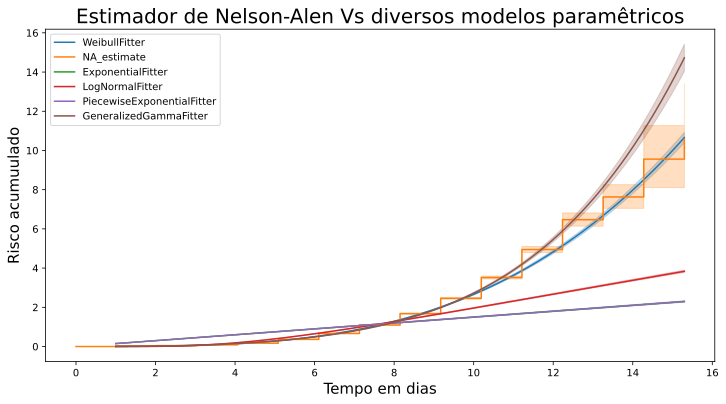

In [18]:
plt.figure(figsize=(12,6))


wbf.plot_cumulative_hazard()
naf.plot_cumulative_hazard()
exf.plot_cumulative_hazard()
lnf.plot_cumulative_hazard()
# llf.plot_cumulative_hazard()
pwf.plot_cumulative_hazard()
ggf.plot_cumulative_hazard()
# sf.plot_cumulative_hazard()


plt.title('Estimador de Nelson-Alen Vs diversos modelos paramêtricos',fontsize=20)
plt.ylabel('Risco acumuulado',fontsize=15)
plt.xlabel('Tempo em dias',fontsize=15)

plt.savefig(ima+"hazard_figures.pdf", bbox_inches='tight',pad_inches=0.1)
plt.show()

In [20]:
wbf.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,7.407778,0.016187,7.376053,7.439504,1.0,395.867546,0.0,inf
rho_,3.263095,0.017632,3.228536,3.297654,1.0,128.347992,0.0,inf


In [77]:
df.columns

Index(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'People & Blogs', 'Pets & Animals',
       'Science & Technology', 'Sports', 'Travel & Events'],
      dtype='object')

In [21]:
dados_sur=dados_sur_orig.copy()
print(dados_sur.shape)
dados_cox=dados_sur[['Subscriptores', 'Duracao', 'view_count_dur',
       'likes_dur', 'dislikes_dur', 'comment_count_dur', 'trending_dur',
       'Status']].copy()

# labels = False coloca numero no lugar dos intervalos
dados_cox['Q_Views']=pd.qcut(dados_cox['view_count_dur'],q = 4, labels = False)
dados_cox['Q_Views_100']=pd.qcut(dados_cox['view_count_dur'],q=100,duplicates='drop', labels = False)
dados_cox['Q_Subscriptores']=pd.qcut(dados_cox['Subscriptores'],q = 4, labels = False)
dados_cox['Q_Duracao']=pd.qcut(dados_cox['Duracao'],q = 4, labels = False)
dados_cox['Q_Comment']=pd.qcut(dados_cox['comment_count_dur'],q = 4, labels = False)
dados_cox['Q_likes']=pd.qcut(dados_cox['likes_dur'],q = 4, labels = False)
dados_cox['Q_dislikes']=pd.qcut(dados_cox['dislikes_dur'],q = 4,duplicates='drop', labels = False)

df=pd.get_dummies(dados_sur['Categoria'])
dados_cox=pd.concat([dados_cox,df],axis=1)

dados_cox.shape

(21589, 10)


(21589, 29)

In [22]:
dados_cox.columns

Index(['Subscriptores', 'Duracao', 'view_count_dur', 'likes_dur',
       'dislikes_dur', 'comment_count_dur', 'trending_dur', 'Status',
       'Q_Views', 'Q_Views_100', 'Q_Subscriptores', 'Q_Duracao', 'Q_Comment',
       'Q_likes', 'Q_dislikes', 'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'People & Blogs', 'Pets & Animals',
       'Science & Technology', 'Sports', 'Travel & Events'],
      dtype='object')

In [23]:
dados_cox=dados_cox.dropna()
print(dados_cox.shape)
dados_cox.columns

(21586, 29)


Index(['Subscriptores', 'Duracao', 'view_count_dur', 'likes_dur',
       'dislikes_dur', 'comment_count_dur', 'trending_dur', 'Status',
       'Q_Views', 'Q_Views_100', 'Q_Subscriptores', 'Q_Duracao', 'Q_Comment',
       'Q_likes', 'Q_dislikes', 'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'People & Blogs', 'Pets & Animals',
       'Science & Technology', 'Sports', 'Travel & Events'],
      dtype='object')

/home/brayan/.local/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 21586 total observations, 0 right-censored observations>
             duration col = 'trending_dur'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 21586
number of events observed = 21586
   partial log-likelihood = -191210.33
         time fit was run = 2022-12-22 01:37:19 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
Subscriptores          0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Duracao               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
view_count_dur        -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
likes_dur              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dislikes_dur           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
comment_count_dur     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Q_Views                0.22       1.24       0.02             0.17             0.27                 1.19                 1.31
Q_Views_100           -0.02       0.98       0.00            -0.03            -0.02                 0.97                 0.98
Q_Subscriptores        0.12       1.12       0.01             0.10             0.13                 1.11                 1.14
Q_Duracao             -0.15       0.86       0.01            -0.17            -0.14                 0.84                 0.87
Q_Comment             -0.17       0.85       0.01            -0.18            -0.15                 0.83                 0.86
Q_likes                0.11       1.12       0.01             0.09             0.14                 1.09                 1.15
Q_dislikes            -0.17       0.84       0.01            -0.19            -0.15                 0.83                 0.86
Autos & Vehicles      -0.48       0.62       0.45            -1.37             0.41                 0.25                 1.51
Comedy                -0.46       0.63       0.45            -1.34             0.42                 0.26                 1.52
Education             -0.38       0.68       0.45            -1.27             0.50                 0.28                 1.66
Entertainment         -0.39       0.68       0.45            -1.27             0.49                 0.28                 1.63
Film & Animation      -0.58       0.56       0.45            -1.46             0.31                 0.23                 1.37
Gaming                -0.18       0.83       0.45            -1.06             0.69                 0.35                 2.00
Howto & Style         -0.55       0.57       0.45            -1.45             0.34                 0.24                 1.40
Music                 -0.57       0.56       0.45            -1.45             0.30                 0.23                 1.35
News & Politics       -0.59       0.56       0.45            -1.47             0.30                 0.23                 1.35
People & Blogs        -0.38       0.68       0.45            -1.26             0.50                 0.28                 1.64
Pets & Animals        -0.46       0.63       0.48            -1.40             0.47                 0.25                 1.60
Science & Technology  -0.40       0.67       0.45            -1.29             0.48                 0.28                 1.62
Sports                -0.34       0.71       0.45            -1.22             0.54                 0.30                 1.71
Travel & Events       -0.13       0.87       0.46            -1.04             0.77                

<AxesSubplot:xlabel='log(HR) (95% CI)'>

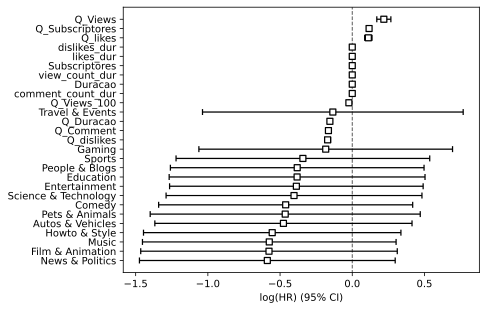

In [24]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(dados_cox, 'trending_dur', event_col='Status')
cph.print_summary()


cph.plot()

In [ ]:

axes = cph.check_assumptions(dados_cox, show_plots=True)


The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



/home/brayan/.local/lib/python3.10/site-packages/lifelines/statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 21586 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                           test_statistic      p  -log2(p)
Autos & Vehicles     km              0.68   0.41      1.29
                     rank            0.91   0.34      1.56
Comedy               km              0.55   0.46      1.13
                     rank            0.66   0.42      1.26
Duracao              km              0.01   0.93      0.11
                     rank            5.60   0.02      5.80
Education            km              0.89   0.35      1.53
                     rank            1.09   0.30      1.75
Entertainment        km              0.82   0.37      1.45
                     rank            0.93   0.34      1.58
Film & Animation     km              0.19   0.66      0.59
                     rank            0.23   0.63      0.67
Gaming               km              0.98   0.32      1.64
                     rank            0.96   0.33      1.61
Howto & Style        km              0.31   0.58      0.80
                     rank            0.43   0.51      0.97
Music                km              0.92   0.34      1.57
                     rank            1.15   0.28      1.82
News & Politics      km              0.02   0.88      0.18
                     rank            0.10   0.75      0.41
People & Blogs       km              0.82   0.37      1.45
                     rank            0.89   0.35      1.53
Pets & Animals       km              1.36   0.24      2.04
                     rank            1.54   0.21      2.22
Q_Comment            km            114.54 <0.005     86.38
                     rank           70.10 <0.005     53.98
Q_Duracao            km            188.68 <0.005    140.21
                     rank          177.90 <0.005    132.40
Q_Subscriptores      km            338.87 <0.005    248.97
                     rank          317.68 <0.005    233.64
Q_Views              km             97.90 <0.005     74.27
                     rank           75.28 <0.005     57.76
Q_Views_100          km            244.79 <0.005    180.88
                     rank          248.12 <0.005    183.29
Q_dislikes           km             28.07 <0.005     23.03
                     rank          296.25 <0.005    218.14
Q_likes              km              7.55   0.01      7.38
                     rank            2.90   0.09      3.49
Science & Technology km              0.46   0.50      1.01
                     rank            0.64   0.43      1.23
Sports               km              1.07   0.30      1.73
                     rank            1.17   0.28      1.84
Subscriptores        km              0.67   0.41      1.27
                     rank            0.79   0.37      1.42
Travel & Events      km              0.44   0.51      0.98
                     rank            0.45   0.50      0.99
comment_count_dur    km              3.63   0.06      4.14
                     rank            2.33   0.13      2.98
dislikes_dur         km              0.34   0.56      0.83
                     rank            0.66   0.42      1.26
likes_dur            km              3.95   0.05      4.42
                     rank            3.84   0.05      4.32
view_count_dur       km              2.43   0.12      3.07
                     rank            4.22   0.04      4.65



1. Variable 'Q_Views' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 4), you can include `strata=['Q_Views', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



In [74]:

pd.concat([dados_sur,df],axis=1).columns


Index(['Id', 'Categoria', 'Subscriptores', 'Duracao', 'view_count_dur',
       'likes_dur', 'dislikes_dur', 'comment_count_dur', 'trending_dur',
       'Status', 'Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'People & Blogs', 'Pets & Animals',
       'Science & Technology', 'Sports', 'Travel & Events'],
      dtype='object')

## Função de risco 

In [ ]:
# Fonte: https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html#other-parametric-models-exponential-log-logistic-log-normal-and-splines
# Algumas referências adicionais:
#

import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

T = dados_sur['trending_dur'] #durations
E = dados_sur['Status'] # event observed
fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])